<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge: Tipos de Gráficos

## Caso : Sample Orders 


# 0. Objetivo

El objetivo de este worksheet es prácticar sobre los principiales tipos de gráficos que podemos utilizar en Data Science para **analizar la relación entre nuestros datos**  y **responder preguntas** . 

No nos olvidemos que en Data Visualization vamos a buscar:

* **Explorar**
* **Explicar**

nuestros datos

Las relaciones sobre las que vamos a trabajar son:

* Relaciones Temporales
* Ranking
* Parte de un Todo
* Desviación
* Correlación
* Comparación

Y dejaremos para la sesión 3 y 4:

* Flujos
* Relaciones Geográficas



Para ello vamos a utilizar la librería de python matplotlib.


En la página web https://matplotlib.org/ tenéis un completo tutorial con ejemplos y manuales donde podréis profundizar y convertiros en auténticos master en matplotlib.

Podemos hacer tantos gráficos que lo mejor es tener a mano la galería y lo que podemos hacer.

In [2]:
#from IPython.display import HTML
# HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

# 1. Visión general del problema.

Nuestra empresa ACME, nos ha proporcionado las ordenes de ventas de nuestros productos 



In [123]:
## importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Definimos las variables para determinar el tamaño de las gráficas
fig_size = (14,5)
fig_size_subplot = (14,7)

# 2.Obtención de los datos

Antes de importar los datos vamos a definir una serie de parámetros que aplicaremos a todos los gráficos. 

Estos pueden ser reescritos en cada gráfico. 



In [124]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired

# Plot size to 14" x 7"
plt.rc('figure', figsize = (8, 5))
# Font size to 14
plt.rc('font', size = 14)
# Do not display top and right frame lines
plt.rc('axes.spines', top = False, right = False)
# Remove grid lines
plt.rc('axes', grid = False)
# Set backgound color to white
plt.rc('axes', facecolor = 'white')


Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.


In [134]:
data_path = 'orders.csv'
df_datos = pd.read_csv(data_path)
df_datos['order_Dte'] = pd.to_datetime(df_datos['order_Dte']) # Tratamiento para fechas
df_datos.index = df_datos['order_Dte']   # set the dataframe index with your date

df_datos.head(20)


,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year
order_Dte,,,,,,,,,,,,,,,
2013-01-01,9285,Critical,949,Consumer,Dortmund,Office Supplies,Accessories,Small Box,-18,3,122,Regular Air,2013-01-01,1,2013
2013-01-01,88028,Not Specified,2211,HomeOffice,Pretoria,Office Supplies,Storage,Large Box,-411,2,186,Express Air,2013-01-01,1,2013
2013-02-01,88296,High,2579,HomeOffice,Charleston,Furniture,Tables,Jumbo Box,-265,1,204,Delivery Truck,2013-02-01,1,2013
2013-04-01,89536,Critical,890,Consumer,Voronezh,Technology,Telephones,Small Box,440,6,766,Regular Air,2013-04-01,1,2013
2013-04-01,86122,Not Specified,1085,HomeOffice,Istanbul,Office Supplies,Paper,Wrap Bag,-39,6,46,Regular Air,2013-04-01,1,2013
2013-05-01,87071,Low,2146,Corporate,Cancun,Office Supplies,Storage,Large Box,29,2,41,Regular Air,2013-05-01,1,2013
2013-07-01,85826,High,2868,Corporate,Aomori,Office Supplies,Accessories,Small Box,3480,6,5509,Regular Air,2013-07-01,1,2013
2013-09-01,86527,Low,2555,HomeOffice,Salem,Office Supplies,Pens,Wrap Bag,-23,12,30,Regular Air,2013-09-01,1,2013
2013-09-01,90166,Critical,896,Corporate,Ryazan,Furniture,Furnishings,Wrap Bag,33,6,52,Regular Air,2013-09-01,1,2013


Vamos a responder a nuestra primera pregunta 
## P.0 ¿hemos cargado bien los datos?

Completa los pasos necesarios para visualizar y familiarizarte con el dataframe 

¿Qué información puedes sacar de esta primera aproximación ? N registros, dimensiones, métricas ...

In [106]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2013-01-01 to 2016-12-28
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     1080 non-null   int64 
 1   Priority     1080 non-null   object
 2   Cust_id      1080 non-null   object
 3   Segment      1080 non-null   object
 4   City         1080 non-null   object
 5   Category     1080 non-null   object
 6   Subcategory  1080 non-null   object
 7   Container    1080 non-null   object
 8   Profit       1080 non-null   int64 
 9   Quantity     1080 non-null   int64 
 10  Sales        1080 non-null   int64 
 11  Mode         1080 non-null   object
 12  Mnth         1080 non-null   int64 
 13  Year         1080 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 126.6+ KB


In [107]:
df_datos.describe()

,order_id,Profit,Quantity,Sales,Mnth,Year
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,82696.897222,142.470370,13.528704,938.123148,6.540741,2014.672222
std,18532.223645,939.359177,12.939909,1982.664315,3.442121,1.132536
min,322.000000,-9916.000000,1.000000,11.000000,1.000000,2013.000000
25%,86661.000000,-58.000000,6.000000,73.000000,4.000000,2014.000000
50%,88288.500000,6.000000,10.000000,238.500000,7.000000,2015.000000
75%,89974.250000,122.500000,17.000000,807.750000,10.000000,2016.000000
max,91579.000000,11043.000000,90.000000,19542.000000,12.000000,2016.000000


## C1 -RELACIONES TEMPORALES

¿Cómo son las ventas las últimas 20 semanas?

Selecciona los gráficos me mejor expliquen la tendencia de ventas, tanto general como por alguna dimensión 

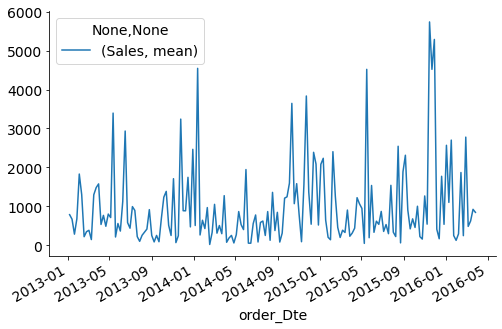

In [130]:
fecha=pd.Grouper(key='order_Dte', freq='W')

campos_filas=[fecha]

campos_valores=['Sales']
agregados={np.mean}

ventas=pd.pivot_table(df_datos,
                                    index=campos_filas,
                                    values=campos_valores,
                                    aggfunc=agregados)
ventas[:(24*7)].plot()

## C2 - PARTES DE UN TODO

¿Qué categoría de producto es la más vendida?   
¿En qué porcentaje?  
¿Cuales son los gráficos que mejor nos muestran esa información ?  



## C3 - COMPARATIVAS

¿Cómo evoluciona cada categoría de producto en estos **dos** ultimos años?

## C4 - ELIJE TU PROPIA VISUALIZACIÓN 

Seguro que ya has visto alguna información que creas interesante mostrar.   

En este apartado puedes explorar por los gráficos que mejor interpreten el dataframe. 
